# COMPANY BANKRUPTCY PREDICTION
Vanellsa Acha, Grace Murnaghan, Martin Zapata

## Motivation
The prediction of corporate bankruptcy is a critical area of financial analysis that holds substantial implications for investors, creditors, policymakers, and the broader economy. By accurately forecasting the likelihood of a company going bankrupt, stakeholders can take preemptive actions to minimize financial losses, allocate resources more effectively, and stabilize market confidence. This question is particularly interesting because of the significant ripple effects corporate failures have on economic growth, employment, and investor confidence. The 2008 global financial crisis underscored the necessity of advanced warning systems that could identify financially distressed companies before they collapse. In a rapidly globalizing and technologically evolving economy, improving bankruptcy prediction models is an essential step toward mitigating systemic financial risks.

Traditionally, bankruptcy prediction models have relied on financial ratios and econometric techniques. Pioneering work in this area includes Altman's Z-score, developed in 1968, which utilized multivariate discriminant analysis based on a set of financial ratios to predict bankruptcy with reasonable accuracy. Since then, researchers have explored various statistical and machine learning methods, such as logistic regression, decision trees, and support vector machines, to improve predictive performance. In recent years, with the growth of accessible financial data and advancements in computational power, machine learning and deep learning models have become prominent in bankruptcy prediction research. These models leverage large datasets to capture complex, non-linear relationships that traditional statistical approaches might miss. However, despite these advancements, accurately predicting bankruptcy remains a challenging task due to the imbalanced nature of bankruptcy datasets, where the number of bankrupt firms is typically much smaller than that of solvent firms.

## Approach
To address this challenge, we are using a comprehensive bankruptcy prediction dataset available on Kaggle, which includes various financial indicators that describe a company’s operational efficiency, profitability, and overall financial health. Our approach involves cleaning and preprocessing the data, which may include handling missing values, standardizing or normalizing the data, and addressing the class imbalance through techniques like oversampling, undersampling, or the application of cost-sensitive algorithms.
An essential step in our process is feature selection, where we identify the most informative features for predicting bankruptcy. This may involve statistical methods, such as correlation analysis, to understand which variables are strongly associated with the target outcome. We will also incorporate domain knowledge to prioritize financial ratios and indicators known to be significant in bankruptcy prediction, such as liquidity ratios, leverage ratios, and profitability measures. Feature selection will help reduce model complexity, improve interpretability, and potentially enhance predictive accuracy by focusing the model on the most relevant information.
Following data preparation and feature selection, we will experiment with a range of machine learning algorithms, including logistic regression, decision trees, random forests, and gradient boosting machines. We will also consider deep learning models if preliminary analyses suggest that more complex relationships could enhance predictive accuracy.
To evaluate model performance, we plan to use cross-validation, ensuring that the results are robust and generalizable. Metrics such as accuracy, precision, recall, and F1 score will provide insights into how well each model distinguishes between bankrupt and solvent companies. Given the high cost of misclassification in bankruptcy prediction, we will emphasize recall and precision over general accuracy, as these metrics directly relate to the model's ability to correctly identify distressed companies.




## Objective: 
This notebook aims to develop a predictive model for corporate bankruptcy using financial data from companies listed on the Taiwan Stock Exchange from 1999 to 2009. The objective is to accurately classify companies as either "bankrupt" or "non-bankrupt" based on a set of financial indicators, thereby providing valuable insights for early identification of financial distress. We start with exploratory data analysis and preprocessing to understand the data's structure and address challenges like class imbalance. Logistic regression is selected as our baseline model, offering a clear performance benchmark before experimenting with more advanced modeling techniques.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc, precision_recall_curve
import tensorflow as tf
from imblearn.over_sampling import SMOTE, ADASYN
import warnings
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from imblearn.ensemble import BalancedRandomForestClassifier

#display
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 100)

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

np.random.seed(42)
tf.random.set_seed(42)

2024-12-06 15:47:43.052851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 15:47:43.234066: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 15:47:43.276298: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 15:47:43.528209: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-06 15:47:45.711631: W tensorflow/compiler/tf2

## 1. Loading Data and Exploration

In [2]:
df = pd.read_csv("data.csv", index_col=False)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

We see that there are 6,819 rows in the complete dataset with 96 columns. There are no null values in our dataset and all features are numeric data types, as well as the target variable: `Bankrupt?`

### 1.1 Exploring Class Balance
Since bankruptcy prediction is often an imbalanced classification problem, we examine the target variable (Bankrupt?) to determine the class distribution.

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


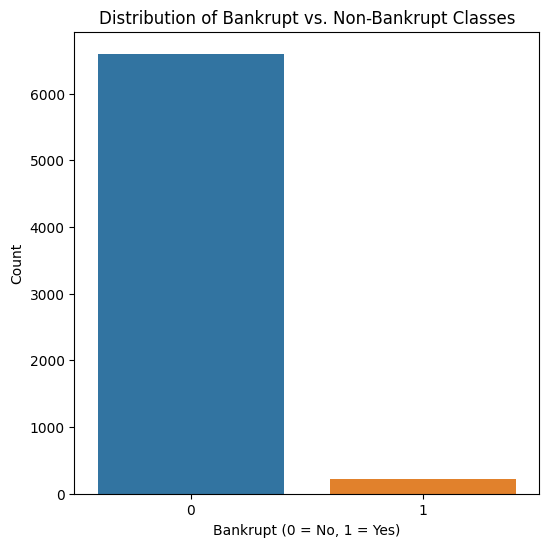

In [4]:
target_distribution = df['Bankrupt?'].value_counts(normalize=True)
print(target_distribution)

#plot to visualize the class distribution of 'Bankrupt?' in the dataset
plt.figure(figsize=(6, 6))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of Bankrupt vs. Non-Bankrupt Classes')
plt.xlabel('Bankrupt (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


The distribution of the target variable, as shown in Figure above, highlights a significant class imbalance in our dataset, where only about 3.2% of companies are labeled as "Bankrupt" (1), while the vast majority (96.8%) are classified as "Non-Bankrupt" (0). This imbalance is typical in bankruptcy prediction datasets, as the occurrence of bankruptcy is relatively rare compared to the number of companies that remain solvent. However, this imbalance poses challenges for our model experimentation, as many standard algorithms tend to favor the majority class, potentially resulting in poor predictive performance for the minority (bankrupt) class.

To address this imbalance, we may employ several techniques to ensure that our model can effectively identify bankrupt companies. Some common approaches include resampling methods, such as oversampling the bankrupt class, undersampling the non-bankrupt class, or using synthetic data generation techniques like Synthetic Minority Over-sampling Technique (SMOTE). Additionally, we may consider using evaluation metrics, such as precision, recall, F1 score, and area under the Precision-Recall curve, which are better suited to imbalanced datasets than overall accuracy. Addressing this imbalance is essential, as the primary goal of our analysis is to accurately predict bankruptcy, a task that inherently requires strong performance on the minority class.

## 2. Data Preprocessing

### 2.1 Data Shuffling
Shuffling will help ensure that each subset (training, validation, and test) has a similar distribution of classes (bankrupt vs. non-bankrupt companies) and other patterns. This is particularly important in our case given we have an imbalanced dataset, where the minority class might be clustered in one part of the data. Shuffling randomizes the data and helps maintain a balanced representation across splits.

In [5]:
#Shuffle the dataset rows
#Setting a seed for reproducibility
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)

### 2.2 Define Outcome Variable and Features
We define Y as the target column ('Bankrupt?') and X as the feature set (all columns except 'Bankrupt?').

In [6]:
# Define X & Y and convert to numpy
X = df_shuffle.drop(columns=['Bankrupt?'])
print(X.shape)

Y = df_shuffle['Bankrupt?'].to_numpy()
print(Y.shape)

(6819, 95)
(6819,)


### 2.3 Data Splitting
Before we proceed to normalization/one-hot encoding, feature selection and engineering, we will split the data sets into training, validation and test data sets. This ensures that the test and validation sets remain truly independent from the training data. It prevents data leakage and maintains real world conditions.

First, we split the data into a training set (60%) and a temporary set (40%) using train_test_split.
Then, we further split the temporary set into validation (20%) and test (20%) sets.

In [7]:
# Split into training (60%) and a temporary set (40%) for validation and test
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)

# Further split the temporary set into validation (20%) and test (20%) sets
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Step 6: Verify the shapes of the resulting splits
print("Shapes of the datasets:")
print("X_train:", X_train.shape, "Y_train:", Y_train.shape)
print("X_val:", X_val.shape, "Y_val:", Y_val.shape)
print("X_test:", X_test.shape, "Y_test:", Y_test.shape)

Shapes of the datasets:
X_train: (4091, 95) Y_train: (4091,)
X_val: (1364, 95) Y_val: (1364,)
X_test: (1364, 95) Y_test: (1364,)


### 3.4 Training Data Exporation

#### Summary Statistics
Understanding the statistical summary of the dataset. This provides insights into the central tendency and spread of each numerical feature, including count, mean, standard deviation, minimum, and maximum values.

In [8]:
X_train.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4.091000e+03,4.091000e+03,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4091.000000,4.091000e+03,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4.091000e+03,4.091000e+03,4.091000e+03,4.091000e+03,4091.000000,4.091000e+03,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4.091000e+03,4.091000e+03,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.0,4091.000000
mean,0.505280,0.558377,0.553642,0.608139,0.608119,0.998625,0.797020,0.808911,0.303599,0.781223,2.032440e+09,1.965053e+09,0.467227,1.837717e+07,0.113375,0.190226,0.190186,0.190220,0.2

From the summary statistics provided, we can derive several key insights about the dataset's characteristics and potential issues to address:
1. **`Class Imbalance`**: The mean for the `Bankrupt?` column is approximately 0.032, indicating that around 3.2% of the companies in the dataset are bankrupt. This suggests a significant class imbalance, which is common in bankruptcy datasets. We will need to apply resampling techniques or use metrics that handle imbalance, such as precision, recall, and F1 score.

2. **`Feature Ranges and Scales`**: The values in each column vary greatly, with some features ranging up to billions (e.g., Operating Expense Rate, Research and development expense rate) while others are between 0 and 1 (e.g., Current Ratio, Quick Ratio). This wide variation in scales suggests the need for feature scaling, such as normalization or standardization, before feeding the data into a machine learning model. 

3. **`Outliers and Data Distribution`**: Many features have maximum values of 1.0, such as Operating Gross Margin, Realized Sales Gross Margin, and several return-on-asset (ROA) measures. However, some other features have extremely high maximum values, such as Research and development expense rate and Operating Expense Rate. These high values might represent outliers, and handling them could improve model stability and performance. Similarly, several columns have a minimum of 0, and the lower percentiles for some columns are close to zero, suggesting that certain metrics may be zero for some companies, potentially indicating missing information or non-relevant values for those firms.

4. **`Skewness`**: The high standard deviations in some features relative to their means (ex. `Operating Expense Rate`, `Total Asset Growth Rate`) imply substantial variation and likely skewness. Many financial ratios and performance metrics tend to have right-skewed distributions, where a small number of companies have very high values. This could impact model performance, especially if not handled appropriately. So, transformations like logarithmic scaling might reduce skewness.

5. **`Potentially Redundant Features:`** Some features seem to convey similar information, such as multiple variations of profitability ratios (`ROA(C)`, `ROA(A)`, `ROA(B)`, etc.), and liquidity ratios (`Current Ratio`, `Quick Ratio`). We will examine the correlation matrix further toidentify highly correlated features, allowing us to drop or combine some redundant features.

6. **`Feature Scaling and Normalization`**: Given the varied scales of features, we will apply feature scaling methods which will help models converge faster and improve performance. We will try (z-score normalization) or min-max scaling are common choices.

#### Feature Correlation
We created a correlation matrix to identify relationships between features. This will be used for feature selection, as highly correlated features may not add much predictive power and could lead to multicollinearity issues.

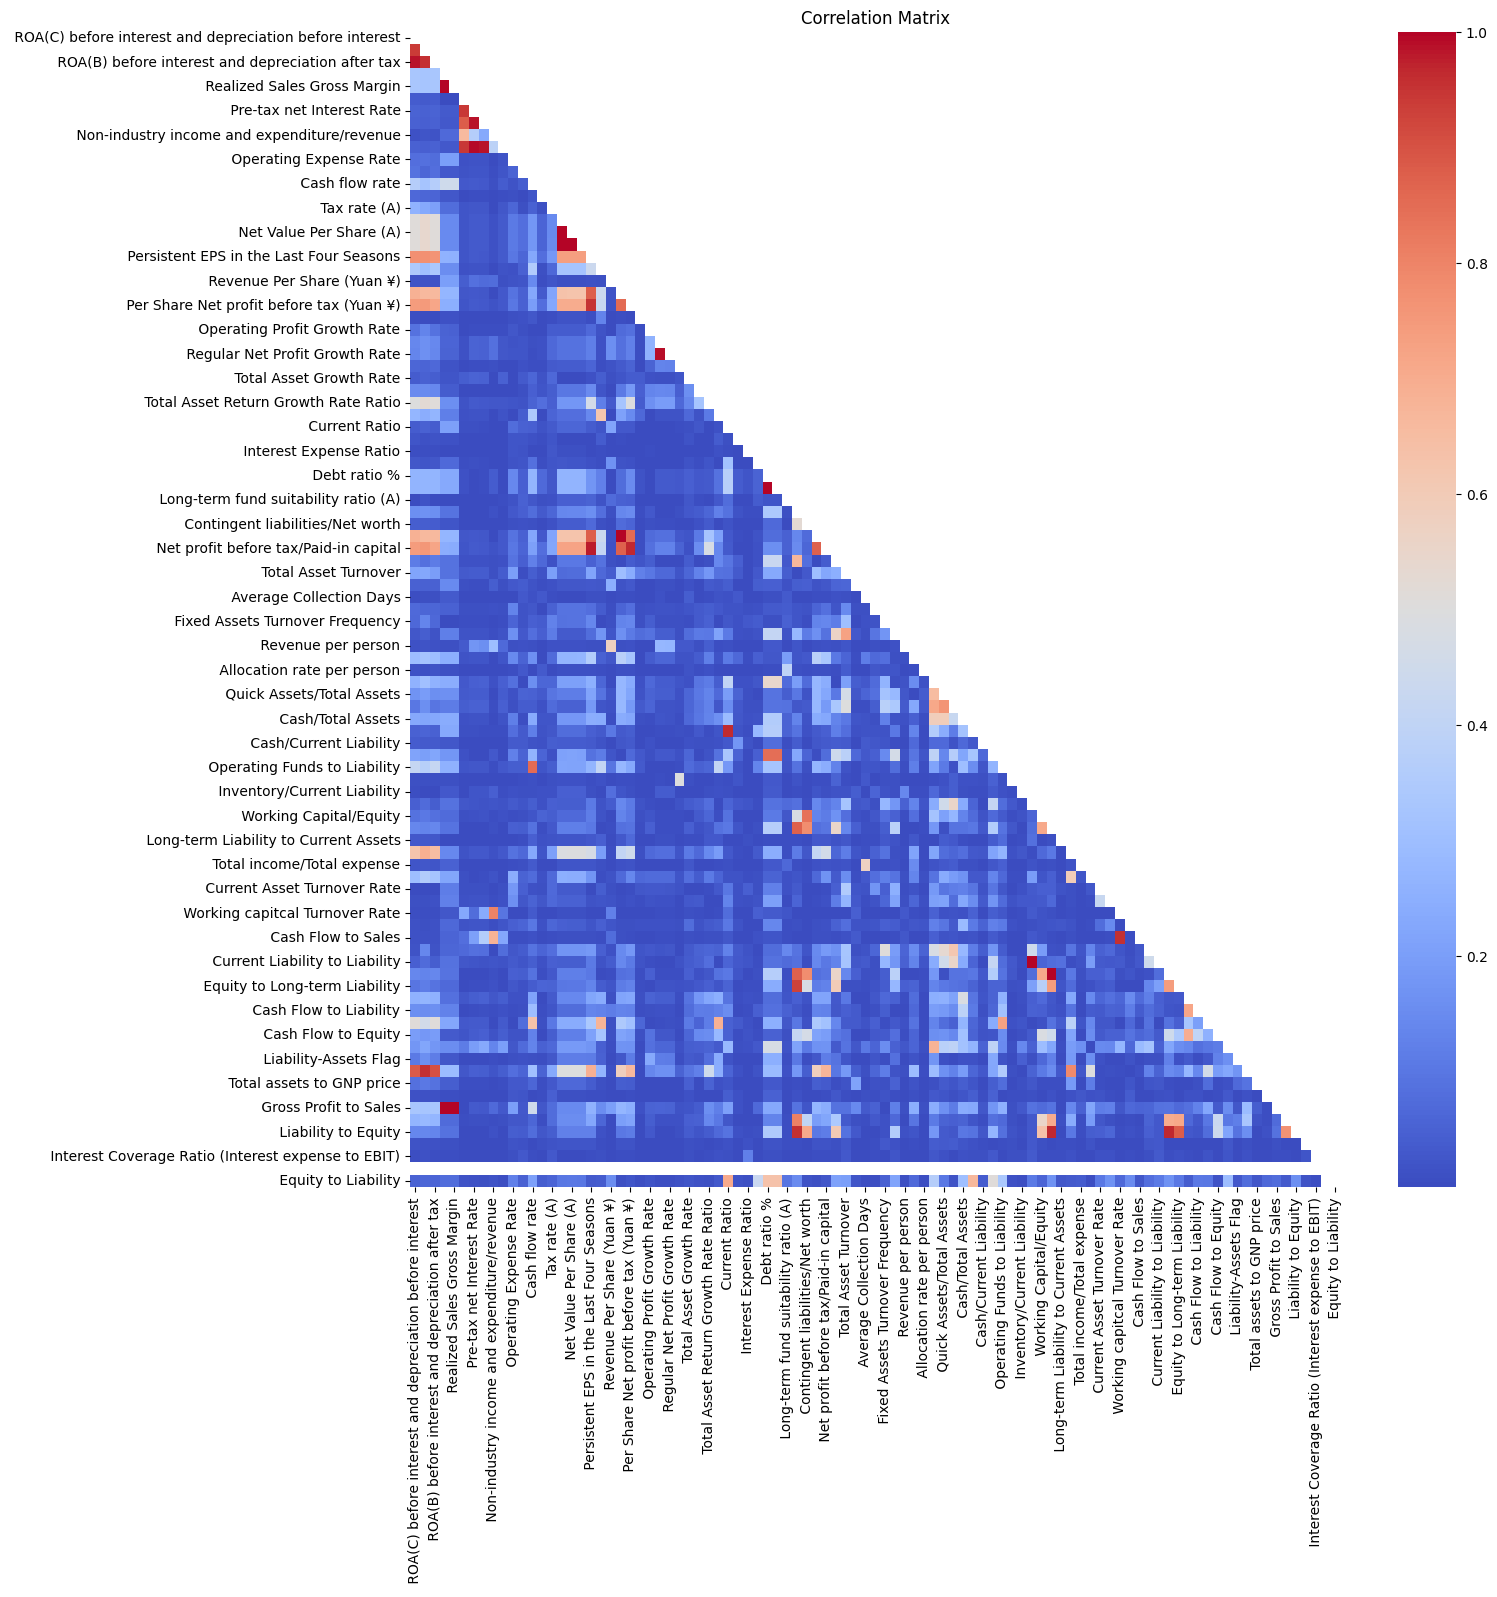

In [9]:
correlation_matrix = X_train.corr().abs()  # Calculate absolute correlation matrix

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", mask=mask)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shown above provides a visual representation of the relationships among the features in our dataset. Each cell in the matrix represents the correlation coefficient between a pair of features, with colors ranging from deep red for high positive correlations to deep blue for high negative correlations. Diagonal elements, representing each feature's correlation with itself, naturally exhibit perfect correlation (a value of 1.0). The matrix highlights several instances of strong correlations between features, suggesting potential redundancy in the dataset. For example, metrics like return-on-assets (ROA), different profitability ratios, and other financial performance indicators tend to exhibit moderate to high correlations with each other, as they often capture related financial information about a company.

To improve the model’s efficiency and avoid issues arising from multicollinearity, we plan to exclude features that have a correlation coefficient greater than 0.90 with other features. By removing highly correlated features, we aim to reduce the dimensionality of the dataset, which can mitigate overfitting, enhance interpretability, and potentially improve model performance. This approach will allow us to retain only the most unique and informative features, ensuring that our predictive models are trained on a streamlined, non-redundant feature set.

### 3.5 Feature Selection
To improve the model’s efficiency and avoid issues arising from multicollinearity, we exclude features that have a correlation coefficient greater than 0.90 with other features. 

In [10]:
# Identify features with correlation greater than 0.90
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Select features that are highly correlated (keeping only one feature from each pair)
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

df_reduced = X_train.drop(columns=high_corr_features)

# Drop features with high correlation
X_train = df_reduced.to_numpy()
X_val = X_val.drop(columns=high_corr_features).to_numpy()
X_test = X_test.drop(columns=high_corr_features).to_numpy()

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (4091, 74)
X_val shape: (1364, 74)
X_test shape: (1364, 74)


### 3.6 Normalization and Standardization
In our classification task, we standardize the features in X_train, X_val, and X_test to ensure that each feature contributes on a comparable scale, which is particularly beneficial for algorithms that rely on distance or gradient-based optimization, such as logistic regression, neural networks, and support vector machines. Without standardization, features with larger ranges could dominate the learning process, leading the model to prioritize certain features over others, even if they aren’t necessarily more informative. Standardization scales each feature to have a mean of 0 and a standard deviation of 1, which helps the model converge more efficiently and prevents it from being biased towards features with naturally larger values. This also ensures that regularization, if applied, affects each feature equally, enhancing model stability and performance across diverse features.

We do not standardize y_train, y_val, and y_test in a classification task like bankruptcy prediction. In classification problems, the target variable (y) typically consists of categorical labels (e.g., 0 for non-bankrupt and 1 for bankrupt). These labels represent classes rather than continuous values, so standardizing them would not make sense and would interfere with the model’s ability to classify.

In [11]:
# Standardize all features in X_train, X_val, and X_test
scaler = StandardScaler()

# Fitting the scaler on the training data only
scaler.fit(X_train)   # Fit the scaler on the training data to compute mean and std.
X_train_std = scaler.transform(X_train) #standardize training data
X_val_std = scaler.transform(X_val) 
X_test_std = scaler.transform(X_test)

## 3. Modeling Experiments

Following data preparation and feature selection, we will experiment with a range of machine learning algorithms, including logistic regression, decision trees, random forests, and gradient boosting machines. We will also consider deep learning models if preliminary analyses suggest that more complex relationships could enhance predictive accuracy.

We will initially use our validation data set(X_train) to To evaluate model performance ensuring that the results are robust and generalizable. Metrics such as accuracy, precision, recall, ROC AUC score and F1 score will provide insights into how well each model distinguishes between bankrupt and solvent companies.

1. **Accuracy(Overall correctness):** Measures the proportion of all correct predictions out of total predictions. Useful for balanced datasets.

2. **Precision(True positive focus):** Tells how many predicted bankruptcies were correct, important when false positives are costly.

3. **Recall(Catch all positives):** Measures how many actual bankruptcies were correctly identified, crucial when missing a bankruptcy is critical.

4. **ROC AUC Score(Discrimination ability):** Evaluates how well the model distinguishes between bankrupt and non-bankrupt cases.

5. **F1 Score(Balance metric):** Harmonizes precision and recall, ideal for imbalanced datasets.

While all these metrics are critical in evaluating the performance of our bankruptcy prediction model, we will place a specific emphasis on recall due to the highly imbalanced nature of our dataset, where over 97% of cases represent non-bankruptcy. Recall measures the model's ability to correctly identify actual bankruptcies, which is particularly important in this context. Missing a bankruptcy (a false negative) can have severe consequences, as it may lead to substantial financial losses, disruptions, or even systemic risks. For example, a missed bankruptcy prediction could result in extending credit to a failing business, leading to unrecoverable losses.

We acknowledge the tradeoff between precision and recall, where increasing recall might lead to a higher number of false positives (predicting bankruptcy for companies that are not bankrupt). However, in this scenario, the cost of a false negative is significantly higher than that of a false positive. A false positive, while inconvenient, primarily results in additional due diligence or conservatively avoiding unnecessary risks. On the other hand, failing to predict a bankruptcy could be fatal to stakeholders relying on the model to preemptively manage financial exposure. For this reason, prioritizing recall ensures the model catches as many bankruptcies as possible, even at the expense of some precision.

### 3.1. Baseline Model
We selected logistic regression as our baseline model due to its simplicity, interpretability, and reliability in binary classification tasks. As a straightforward algorithm, logistic regression provides a solid reference point, allowing us to benchmark performance before moving to more complex models that may address the class imbalance more effectively.

In [12]:
# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_std, Y_train)

# Predict on the test set
y_pred = logreg.predict(X_val_std)
y_prob = logreg.predict_proba(X_val_std)[:, 1]  # For ROC-AUC score

# Evaluate the model
classification_rep = classification_report(Y_val, y_pred)
conf_matrix = confusion_matrix(Y_val, y_pred)
roc_auc = roc_auc_score(Y_val, y_prob)

# Calculate accuracy
accuracy = accuracy_score(Y_val, y_pred)

print(classification_rep)
print(f"ROC-AUC: {roc_auc}")
print(f"Overall accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1328
           1       0.32      0.19      0.24        36

    accuracy                           0.97      1364
   macro avg       0.65      0.59      0.61      1364
weighted avg       0.96      0.97      0.96      1364

ROC-AUC: 0.8393888052208835
Overall accuracy: 0.967741935483871


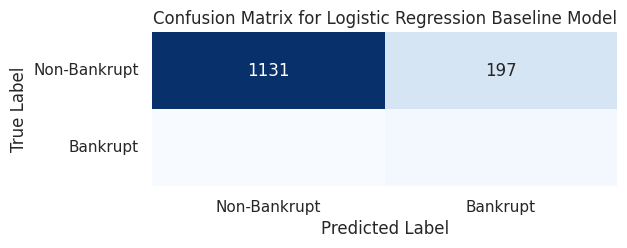

In [37]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Baseline Model")
plt.show()

The confusion matrix for the logistic regression baseline model on the validation dataset shows a significant imbalance in the model's predictive capabilities. The model correctly classified 1,313 non-bankrupt companies (true negatives) and misclassified 15 as bankrupt (false positives), indicating high accuracy for the majority class. However, the model only correctly identified 7 bankrupt companies (7 true positives), misclassifying the 29 other truly bankrupt companies as non-bankrupt (false negatives).

This pattern highlights a common issue in highly imbalanced datasets, where the model becomes biased toward the majority class, leading to poor performance on the minority class (bankrupt companies in this case). This results in a high overall accuracy but reveals the model’s inability to detect bankrupt companies, which is the primary focus of this classification task. This indicates that additional techniques, such as class balancing, resampling, or more sophisticated algorithms, are necessary to improve performance on the minority class.

### 3.2. Balancing training data  with baseline model

Having imbalanced training data can lead to having a poorly-performing learned model. We see this occur in the learned baseline classifier, where the model almost exclusively predicts the majority class. Due to the highly imbalanced data, the baseline classifier appears to have high accuracy (97% on the validation data), however, this is driven by correctly predicting 'non-bankrupt' rather than being able to predict which companies will go bankrupt. We can see evidence of this poor performance on the minority class in the validation precision and recall for class 1: 33% and 19%, respectively.

We employ several techniques to address the class imbalance in the training data with the goal of improving precision and recall for the minority class. To evaluate how various class balancing techniques perform on our dataset, we will train a logistic regression in the same way as the baseline classifier was trained on re-balanced datasets. Then we can compare performance of learned models between the baseline and models using various balancing techniques.

#### a. Upsampling using random sampling with replacement

The first technique is the basic upsampling to balance the classes by making copies of random examples from the minority class. In doing so, we are increasing the frequency of positive class examples but not adding any variation to the features of the examples in the positive class which may lead to overfitting or memorization of the replicated positive class examples.

In [14]:
# subset standardized data by training label
X_train_pos = X_train_std[Y_train==1]
X_train_neg = X_train_std[Y_train==0]

# upsample positive class
num_samples = len(X_train_neg) - len(X_train_pos)
X_train_pos_upsampled = sklearn.utils.resample(X_train_pos, n_samples=num_samples, random_state=42)
Y_train_pos_upsampled = np.ones((len(X_train_pos_upsampled),))

X_train_upsampled = np.vstack([X_train_pos, X_train_neg, X_train_pos_upsampled])
Y_train_upsampled = np.concatenate([Y_train, Y_train_pos_upsampled])

print(f"X_train_upsampled shape: {X_train_upsampled.shape}")
print(f"Y_train_upsampled shape: {Y_train_upsampled.shape}")
print(f"Count by class after upsampling:\n{pd.Series(Y_train_upsampled).value_counts()}")

X_train_upsampled shape: (7928, 74)
Y_train_upsampled shape: (7928,)
Count by class after upsampling:
0.0    3964
1.0    3964
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.97      0.80      0.87      1328
           1       0.02      0.17      0.04        36

    accuracy                           0.78      1364
   macro avg       0.50      0.48      0.46      1364
weighted avg       0.95      0.78      0.85      1364

ROC AUC score: 0.48092


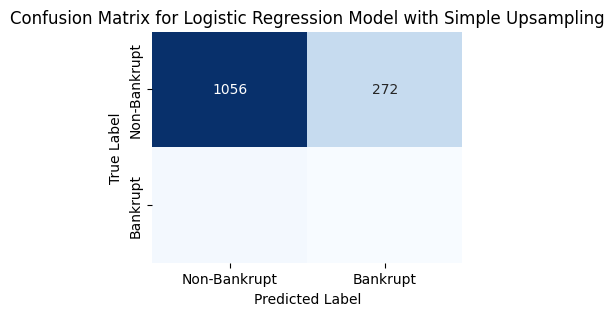

In [15]:
# re-train logistic regression
logreg_upsampling = LogisticRegression(max_iter=1000)
logreg_upsampling.fit(X_train_upsampled, Y_train_upsampled)

# Predict on the test set
y_pred = logreg_upsampling.predict(X_val)

# Evaluate the model
classification_rep = classification_report(Y_val, y_pred)
print(classification_rep)
roc_auc = roc_auc_score(Y_val, y_pred)
print(f"ROC AUC score: {roc_auc:.5f}")

# confusion matrix
conf_matrix = confusion_matrix(Y_val, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Model with Simple Upsampling")
plt.show()

In the above, we see that the simple logistic regression model trained on the upsampled data predicts the minority class more frequently than the baseline model (267 examples vs. 21 examples), however, the updated model is only correct in those predictions in 6 of 267 cases. The increase in false positives with little change in the number of false negatives brings the overall accuracy of the model down to 79% on the validation data. Looking at the minority class specifically, we see precision is only 2% due to the high number of false positives, a decrease from the baseline model. Recall for the minority class is 17%, the decrease in this metric over the baseline classifier reflects one fewer example correctly classified as bankrupt (6 vs. 7).

In a real-world scenario for a company issuing loans or writing insurance where there is a large cost to bankruptcy, a company may be ok in sacrificing accuracy and performance on the majority class to be able to more frequently identify bankruptcy. In these cases, recall on the positive class is a metric we will want to prioritize while not letting accuracy and minority class performance degrade too much, since there's also a cost to flagging too many companies for risk of bankrupcy. ROC AUC score which summarizes the ROC curve (false positive rate and true positive rate at various thresholds) has decreased from the baseline model to this model which employs random upsampling. Therefore, there is not evidence that this data balancing technique provides imporovement over the baseline model.

#### b. SMOTE

SMOTE is another technique to balance a training dataset. Unlike sampling with replacement as displayed above, SMOTE creates synthetic examples by performing certain operations on training data examples, introducing more variation in the positive examples the model learns from. According to [Chawla, et al. (2002)](https://arxiv.org/pdf/1106.1813), "[t]he minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors." For our experimentation, we implement SMOTE using the imbalanced-learn package.

Count by class after upsampling:
0    3964
1    3964
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.97      0.73      0.83      1328
           1       0.02      0.17      0.03        36

    accuracy                           0.71      1364
   macro avg       0.49      0.45      0.43      1364
weighted avg       0.94      0.71      0.81      1364

ROC AUC score: 0.44704


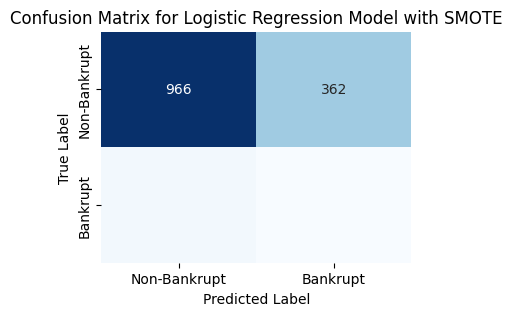

In [16]:
# oversample using SMOTE
sm = SMOTE(sampling_strategy='minority', k_neighbors=3, random_state=42)
X_train_res_smote, Y_train_res_smote = sm.fit_resample(X_train_std, Y_train)
print(f"Count by class after upsampling:\n{pd.Series(Y_train_res_smote).value_counts()}")

# re-train logistic regression
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_res_smote, Y_train_res_smote)

# Predict on the test set
y_pred = logreg_smote.predict(X_val)

# Evaluate the model
classification_rep = classification_report(Y_val, y_pred)
print(classification_rep)
roc_auc = roc_auc_score(Y_val, y_pred)
print(f"ROC AUC score: {roc_auc:.5f}")

# confusion matrix
conf_matrix = confusion_matrix(Y_val, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Model with SMOTE")
plt.show()

Similar to SMOTE, [ADASYN](https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn), or Adaptive Synthetic sampling, is an algorithm that generates synthetic examples for model training using k-Nearest Neighbors. ADASYN takes the method used in SMOTE a step further by focusing on creating new examples that are similar to training examples that are difficult to classify. The way that ADASYN does this is by finding training examples that are more likely to be misclassified by a KNN classifier and generating synthetic examples close to those points  that are next to original samples in the dataset ([Danquah, 2020](https://www.arxiv.org/pdf/2010.04326)). 

Count by class after upsampling:
1    3975
0    3964
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      1328
           1       0.01      0.14      0.03        36

    accuracy                           0.72      1364
   macro avg       0.49      0.44      0.43      1364
weighted avg       0.94      0.72      0.82      1364

ROC AUC score: 0.43955


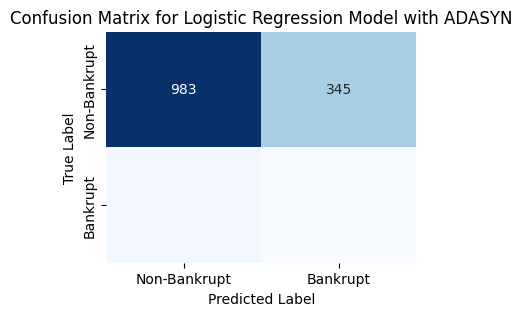

In [17]:
# oversample using ADASYN
sm = ADASYN(sampling_strategy='minority', n_neighbors=5, random_state=42)
X_train_res_adasyn, Y_train_res_adasyn = sm.fit_resample(X_train_std, Y_train)
print(f"Count by class after upsampling:\n{pd.Series(Y_train_res_adasyn).value_counts()}")

# re-train logistic regression
logreg_adasyn = LogisticRegression(max_iter=1000)
logreg_adasyn.fit(X_train_res_adasyn, Y_train_res_adasyn)

# Predict on the test set
y_pred = logreg_adasyn.predict(X_val)

# Evaluate the model
classification_rep = classification_report(Y_val, y_pred)
print(classification_rep)
roc_auc = roc_auc_score(Y_val, y_pred)
print(f"ROC AUC score: {roc_auc:.5f}")

# confusion matrix
conf_matrix = confusion_matrix(Y_val, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Model with ADASYN")
plt.show()

We don't see much lift from the oversampling techniques, but SMOTE has the highest recall for class 1.

## 3.3 Logistic regression model using the Keras Sequential API:

For this model we’ll use the data sets before the balancing techniques. 
1. First, we clear the session to ensure we have a clear model and avoid conflicts.
2. Set the random seed to 42 to match our base model.
3. Define the Input layer for our number of features.
4. Define the output layer for single binary classification, sigmoid activation, and RandomNormal(stddev = 0.01) initializers for the kernel and bias.
5. The model will use the Adam optimizer to improve convergence
6. Finally the loss function for binary classification BinaryCrossentropy()


In [18]:
# define an instance of the early_stopping class
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='val_loss', 
verbose=1,
patience=5,
mode='max',
restore_best_weights=True)

def build_model(num_features, learning_rate):
    """Return a simple logistic regression model using the Keras Sequential API."""
    # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    
    # Use Keras Sequential API to build a logistic regression model
    model = tf.keras.Sequential()
    
    # Create input layer
    model.add(tf.keras.Input(shape=(num_features,), name='Input'))
    
    # Create output layer
    model.add(tf.keras.layers.Dense(
        units=1,  # Single unit for binary classification
        use_bias=True,
        activation='sigmoid',  # Sigmoid activation for binary classification
        kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01),
        bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.01),
        name='Output'
    ))
    
    # Define the optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # Compile model with Binary Crossentropy loss for binary classification
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=optimizer,
        metrics=['accuracy']
    )
    
    return model

In [19]:
#Build the model
features = df_reduced.columns #isolate the features

learning_rate = 0.01
model_tf = build_model(num_features=len(features), learning_rate=learning_rate)

In [20]:
#Fit the model with 20 epochs and 32 batch size
epochs = 20
batch_size = 32

# Train model
history = model_tf.fit(x=X_train_std,
                y=Y_train,
                validation_data=[X_val_std, Y_val],
                batch_size= batch_size,
                epochs=epochs,
                callbacks=[early_stopping],
                verbose=0
                
)

Restoring model weights from the end of the best epoch: 20.


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


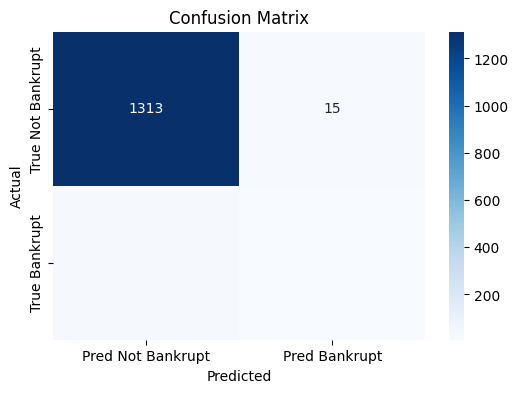

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1328
           1       0.35      0.22      0.27        36

    accuracy                           0.97      1364
   macro avg       0.66      0.61      0.63      1364
weighted avg       0.96      0.97      0.97      1364

ROC AUC score: 0.60546
Model Accuracy: 97.0%


In [21]:
# Get predictions for the test set
y_pred_prob = model_tf.predict(X_val_std)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Compute confusion matrix
cm = confusion_matrix(Y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred Not Bankrupt', 'Pred Bankrupt'], yticklabels=['True Not Bankrupt', 'True Bankrupt'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluate the model
classification_rep = classification_report(Y_val, y_pred)



# Calculate accuracy
accuracy = accuracy_score(Y_val, y_pred)
print(classification_rep)

#ROC AUC Score
roc_auc = roc_auc_score(Y_val, y_pred)
print(f"ROC AUC score: {roc_auc:.5f}")
print(f'Model Accuracy: {round(accuracy, 2)*100}%')

The model achieves a high overall accuracy of 97.0%, indicating strong performance in classifying the majority class (Non-Bankrupt). The precision and recall for class 0 are excellent, with a precision of 0.98 and a  recall of 0.99. However, the performance for class 1 (Bankruptcy) is poor, with a precision of 0.35, recall of 0.22. This suggests that the model struggles with identifying instances of the minority class, likely due to class imbalance. We will try to run the same technique with balanced data using SMOTE.

### 3.4 Logistic regression model using the Keras Sequential API with SMOTE:

For this model we’ll use the data sets with SMOTE 
1. First, we clear the session to ensure we have a clear model and avoid conflicts.
2. Set the random seed to 42 to match our base model.
3. Define the Input layer for our number of features.
4. Define the output layer for single binary classification, sigmoid activation, and RandomNormal(stddev = 0.01) initializers for the kernel and bias.
5. The model will use the Adam optimizer to improve convergence
6. Finally the loss function for binary classification BinaryCrossentropy()

In [22]:
features = df_reduced.columns #isolate the features
learning_rate = 0.01

model_tf_smote = build_model(num_features=len(features), learning_rate=learning_rate)

In [23]:
epochs = 20
batch_size = 32

# Train model with SMOTE
history = model_tf_smote.fit(x=X_train_res_smote,
                y=Y_train_res_smote,
                validation_data=[X_val_std, Y_val],
                batch_size= batch_size,
                epochs=epochs,
                callbacks=[early_stopping],
                verbose=0
)

Restoring model weights from the end of the best epoch: 20.


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


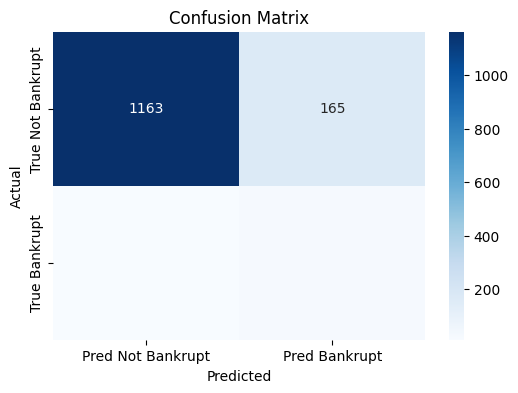

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1328
           1       0.13      0.69      0.22        36

    accuracy                           0.87      1364
   macro avg       0.56      0.79      0.58      1364
weighted avg       0.97      0.87      0.91      1364

ROC AUC score: 0.78510
Model Accuracy: 87.0%


In [24]:
# Get predictions for the test set
y_pred_prob = model_tf_smote.predict(X_val_std)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Compute confusion matrix
cm = confusion_matrix(Y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred Not Bankrupt', 'Pred Bankrupt'], yticklabels=['True Not Bankrupt', 'True Bankrupt'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluate the model
classification_rep = classification_report(Y_val, y_pred)



# Calculate accuracy
accuracy = accuracy_score(Y_val, y_pred)
print(classification_rep)

#ROC AUC Score
roc_auc = roc_auc_score(Y_val, y_pred)
print(f"ROC AUC score: {roc_auc:.5f}")
print(f'Model Accuracy: {round(accuracy, 2)*100}%')

After applying SMOTE to balance the dataset, the model's overall accuracy decreased to 87.0%. For class 0 Non-Bankrupt, the precision remains high at 0.99, but recall dropped to 0.88. For class 1 Bankrupt, the recall improved significantly to 0.69, but precision is low at 0.13. Recall is important for us as we would like to predict Bankrupt companies even if that means increase false positives.
While SMOTE improved the model's ability to detect the minority class (1) Bankrupt, precision and overall performance for this class remain limited, suggesting room for further optimization.


### 3.5 Random Forest and Sampling
In this fifth model, we used a Random Forest Classifier to improve our classification of bankrupt companies. Random Forests are an ensemble method that combines multiple decision trees to make more robust predictions. Unlike logistic regression, which relies on a linear decision boundary, Random Forests can capture more complex, non-linear relationships in the data, which can help in identifying bankrupt companies even in an imbalanced dataset. 

For the Random Forest and tree based models, we will not be using the standardized dataset as tree-based models do not require feature scaling or standardization. Tree-based models split data based on feature thresholds (e.g., "Is feature X > 5?"). These splits are independent of feature scaling or standardization because they do not rely on distance-based calculations or gradient descent optimization. Standardization alters the absolute values of thresholds in trees, potentially affecting their ability to optimally partition data. This can lead to slightly less effective splits for some features.

Tree-based models do not require standardization because:
- They are not sensitive to feature magnitudes or distributions.
- They determine thresholds for splits directly from the data.
- They handle mixed feature scales well, making standardization redundant.


In [25]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_classifier.fit(X_train, Y_train)

# Predict on the validation
y_pred_rf = rf_classifier.predict(X_val)
y_prob_rf = rf_classifier.predict_proba(X_val)[:, 1]  # For ROC-AUC score

# Evaluate the model
classification_rep_rf = classification_report(Y_val, y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_val, y_pred_rf)
roc_auc_rf = roc_auc_score(Y_val, y_prob_rf)
accuracy_rf = accuracy_score(Y_val, y_pred_rf)

print(classification_rep_rf), 
print("Confusion Matrix:\n",conf_matrix_rf), 
print("ROC AUC Score: ",roc_auc_rf), 
print("Accuracy:",accuracy_rf)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1328
           1       0.29      0.06      0.09        36

    accuracy                           0.97      1364
   macro avg       0.63      0.53      0.54      1364
weighted avg       0.96      0.97      0.96      1364

Confusion Matrix:
 [[1323    5]
 [  34    2]]
ROC AUC Score:  0.9185805722891567
Accuracy: 0.9714076246334311


- Precision (Bankruptcy): 0.29 – Only 29% of the predicted bankruptcies are correct, indicating a high rate of false positives.
- Recall (Bankruptcy): 0.06 – Captures only 6% of actual bankrupt companies, meaning it misses most.
- F1-Score (Bankruptcy): 0.09 – Poor balance between precision and recall due to very low recall.
- ROC AUC: 0.918 – The model demonstrates good overall class separation, but this metric does not specifically address performance on the minority class.
- Accuracy: 0.97 - While the overall accuracy is high, this is misleading due to the severe class imbalance. It reflects the model's strength in predicting the majority class (non-bankruptcy).
- Confusion Matrix: 34 out of 36 bankruptcies were misclassified as non-bankrupt. This indicates that the model misclassified 94% of actual bankruptcies (34 out of 36), highlighting its significant weakness in recall for the minority class.

    - True Negatives: 1323 (correctly predicted non-bankruptcies)
    - False Positives: 5 (non-bankruptcies misclassified as bankruptcies)
    - False Negatives: 34 (bankruptcies misclassified as non-bankruptcies)
    - True Positives: 2 (correctly predicted bankruptcies)
- Insight: Random Forest struggles with recall, which is critical for identifying bankruptcies, making it unsuitable for our task.

### 3.6 XGBOOST
Gradient Boosting methods (e.g., XGBoost, LightGBM) tend to be more flexible and can handle imbalanced data better than Random Forests. These models iteratively improve on misclassified examples, which can help capture patterns in the minority class (bankrupt companies) more effectively.

- XGBoost allows you to set a `scale_pos_weight` parameter to handle class imbalance, which can be set to the ratio of the majority to minority classes.

We calculate `scale_pos_weight` to handle class imbalance by determining the ratio of negative samples to positive samples in the training labels Y_train. This weight is then passed to the XGBClassifier as the `scale_pos_weight` parameter, instructing the model to give more importance to the minority class during training.

In [26]:
# Set up the scale_pos_weight based on the imbalance ratio
scale_pos_weight = len(Y_train[Y_train == 0]) / len(Y_train[Y_train == 1])

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, Y_train)

# Predict on the validation set
y_pred_xgb = xgb_model.predict(X_val)
y_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("XGBoost Model Performance")
print(classification_report(Y_val, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_val, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(Y_val, y_prob_xgb))
print("Accuracy:", accuracy_score(Y_val, y_pred_xgb))


XGBoost Model Performance
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1328
           1       0.42      0.44      0.43        36

    accuracy                           0.97      1364
   macro avg       0.70      0.71      0.71      1364
weighted avg       0.97      0.97      0.97      1364

Confusion Matrix:
 [[1306   22]
 [  20   16]]
ROC AUC Score: 0.9531459170013387
Accuracy: 0.969208211143695


- Precision (Bankruptcy): 0.42 – Out of all predicted bankruptcies, 42% are correct, indicating a significant improvement over Random Forest but still reflecting moderate accuracy in predicting bankrupt cases.
- Recall (Bankruptcy): 0.44 – The model captures 44% of actual bankruptcies, a notable improvement from the 6% achieved by Random Forest, but there is still room for enhancement to minimize missed cases.
- F1-Score (Bankruptcy): 0.43 – This score reflects a more balanced performance between precision and recall compared to Random Forest, though both metrics remain moderate.
- ROC AUC: 0.95 – Good overall performance in distinguishing between classes.
- Accuracy: 0.97 - The high overall accuracy continues to reflect the model's strong performance on the majority class but does not fully capture the minority class's challenges.
- Confusion Matrix: 
    - True Negatives: 1306 (correctly predicted non-bankruptcies)
    - False Positives: 22 (non-bankruptcies misclassified as bankruptcies)
    - False Negatives: 20 (bankruptcies misclassified as non-bankruptcies)
    - True Positives: 16 (correctly predicted bankruptcies)
This shows that the model successfully identifies 16 bankruptcies, but 20 bankruptcies are still misclassified as non-bankrupt.
- Insight: XGBoost is a significant improvement over Random Forest, with better recall and F1-score, but it still misses a substantial number of bankruptcies.

### 3.7 LightGBM with Class Weighting
LightGBM offers a class_weight parameter that can be set to balanced, or you can manually provide class weights.  

We apply class weights in LightGBM to handle class imbalance during model training. The `class_weight` parameter is set to a dictionary where class 0 has a weight of 1 and class 1 has a weight of `scale_pos_weight`, effectively emphasizing the minority class in training. `scale_pos_weight` is a parameter used to address class imbalance by adjusting the weight assigned to the positive class during training. It is typically calculated as the ratio of the number of negative samples to positive samples, helping the model pay more attention to the minority class. This is particularly useful in imbalanced datasets like ours where the positive class has significantly fewer samples.

In [27]:
# Define class weights
class_weights = {0: 1, 1: scale_pos_weight}

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight=class_weights)
lgb_model.fit(X_train, Y_train)

# Predict on the validation set
y_pred_lgb = lgb_model.predict(X_val)
y_prob_lgb = lgb_model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("LightGBM Model Performance")
print(classification_report(Y_val, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(Y_val, y_pred_lgb))
print("ROC AUC Score:", roc_auc_score(Y_val, y_prob_lgb))
print("Accuracy:", accuracy_score(Y_val, y_pred_lgb))

[LightGBM] [Info] Number of positive: 127, number of negative: 3964
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18356
[LightGBM] [Info] Number of data points in the train set: 4091, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM Model Performance
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1328
           1       0.49      0.47      0.48        36

    accuracy                           0.97      1364
   macro avg       0.74      0.73      0.73      1364
weighted avg       0.97      0.97      0.97      1364

Confusion Matrix:
 [[1310   18]
 [  19   17]]
ROC AUC Score: 0.9323753346720214
Accuracy: 0.9728739002932552


- Precision (Bankruptcy): 0.44 – Out of all predicted bankruptcies, 49% are correct. This reflects a moderate ability to correctly predict bankruptcies, improving over previous models.
- Recall (Bankruptcy): 0.47 – The model captures 47% of actual bankruptcies, slightly better than XGBoost and significantly higher than Random Forest. However, it still misses more than half of the bankrupt companies.
- F1-Score (Bankruptcy): 0.48 - This score indicates a reasonably balanced performance between precision and recall, making LightGBM a better option for handling this imbalanced dataset compared to prior models.
- ROC AUC: 0.925 – The model demonstrates strong overall class separation, comparable to XGBoost, but still focuses on both classes rather than emphasizing the minority class.
- Accuracy: 0.97 - The overall accuracy remains high due to the dominance of non-bankrupt cases in the dataset, though this metric does not adequately reflect the performance for the minority class.
- Confusion Matrix:
    - True Negatives: 1310 (correctly predicted non-bankruptcies)
    - False Positives: 18 (non-bankruptcies misclassified as bankruptcies)
    - False Negatives: 19 (bankruptcies misclassified as non-bankruptcies)
    - True Positives: 17 (correctly predicted bankruptcies)
This indicates that the model successfully identifies 17 bankruptcies, an improvement over XGBoost, while misclassifying 19 bankruptcies as non-bankrupt.
- Insight: LightGBM edges out XGBoost slightly with better precision and recall, making it a solid contender.

### 3.8 Balanced Random Forest 
Use a variation of Random Forest called Balanced Random Forest, which performs balanced resampling in each bootstrap sample to improve minority class focus.

BRF modifies the standard random forest by resampling the training data for each tree. Specifically, it randomly under-samples the majority class to match the size of the minority class for training each individual tree, ensuring that the model learns equally from both classes.
This approach helps to reduce bias toward the majority class and improves predictive performance on the minority class.


In [28]:
# Initialize and train the Balanced Random Forest model
brf_model = BalancedRandomForestClassifier(random_state=42)
brf_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_brf = brf_model.predict(X_val)
y_prob_brf = brf_model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("Balanced Random Forest Model Performance")
print(classification_report(Y_val, y_pred_brf))
print("Confusion Matrix:\n", confusion_matrix(Y_val, y_pred_brf))
print("ROC AUC Score:", roc_auc_score(Y_val, y_prob_brf))
print("Accuracy:", accuracy_score(Y_val, y_pred_brf))


Balanced Random Forest Model Performance
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1328
           1       0.14      0.86      0.23        36

    accuracy                           0.85      1364
   macro avg       0.57      0.86      0.58      1364
weighted avg       0.97      0.85      0.90      1364

Confusion Matrix:
 [[1131  197]
 [   5   31]]
ROC AUC Score: 0.9413801037483266
Accuracy: 0.8519061583577713


- Precision (Bankruptcy): 0.14 – Out of all predicted bankruptcies, only 14% are correct, indicating a high rate of false positives. Precision has dropped significantly compared to previous models.
- Recall (Bankruptcy): 0.86 – The model captures 86% of actual bankruptcies, a dramatic improvement over all previous models. This shows its strong ability to identify the minority class.
- F1-Score (Bankruptcy): 0.23 – The F1-score reflects the tradeoff between precision and recall. While recall is very high, the low precision pulls down the overall balance of the metric.
- ROC AUC: 0.944 – The model demonstrates strong overall discrimination ability, comparable to other models, but with a focus on the minority class due to balancing techniques.
- Accuracy: 0.85 - The overall accuracy is lower compared to previous models, as the Balanced Random Forest sacrifices performance on the majority class to better identify the minority class.
- Confusion Matrix: Correctly identifies 32 bankruptcies, missing only 4, but at the cost of 190 false positives.
    - True Negatives: 1131 (correctly predicted non-bankruptcies)
    - False Positives: 197 (non-bankruptcies misclassified as bankruptcies)
    - False Negatives: 5 (bankruptcies misclassified as non-bankruptcies)
    - True Positives: 31 (correctly predicted bankruptcies)
This indicates that the model successfully identifies 31 bankruptcies, leaving only 5 bankruptcies misclassified as non-bankrupt. However, this comes at the cost of 197 false positives.
- Insight: Balanced Random Forest prioritizes recall and does a stellar job in identifying bankrupt companies. However, the high number of false positives (low precision) could create significant noise for follow-up actions.

Plotting Metrics for All tree based Models

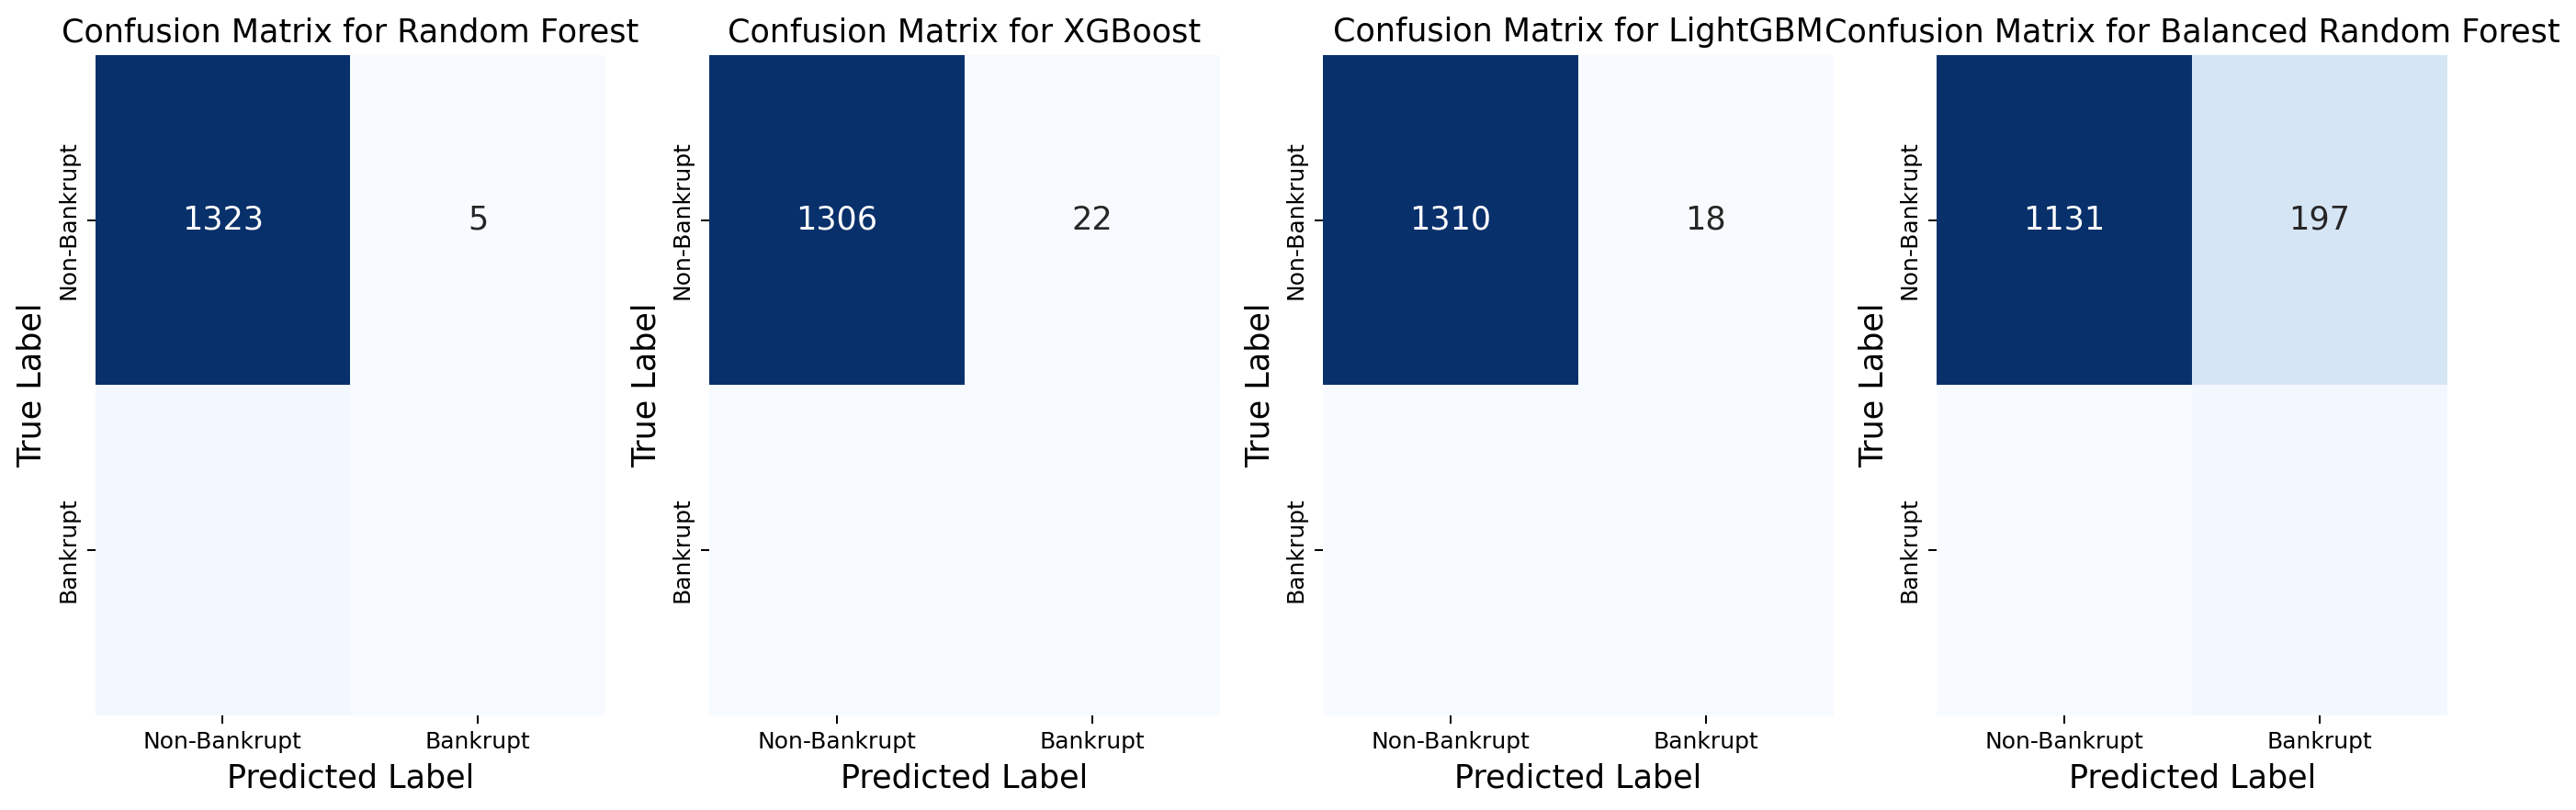

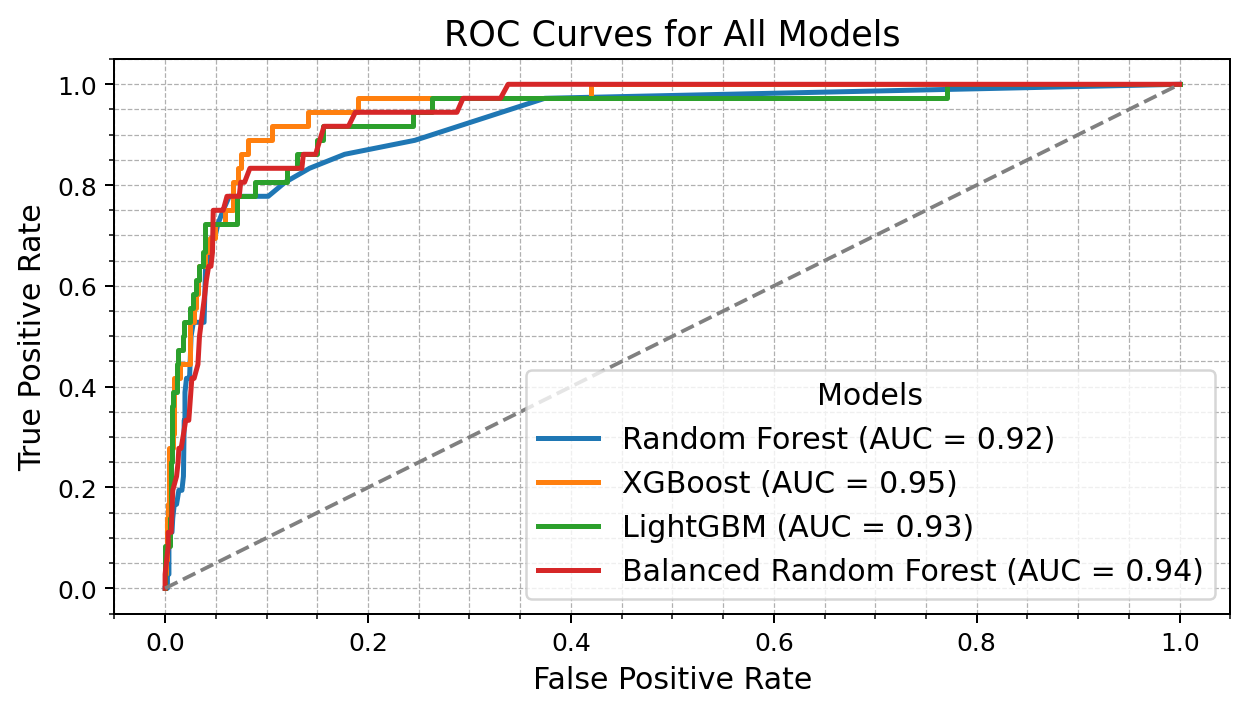

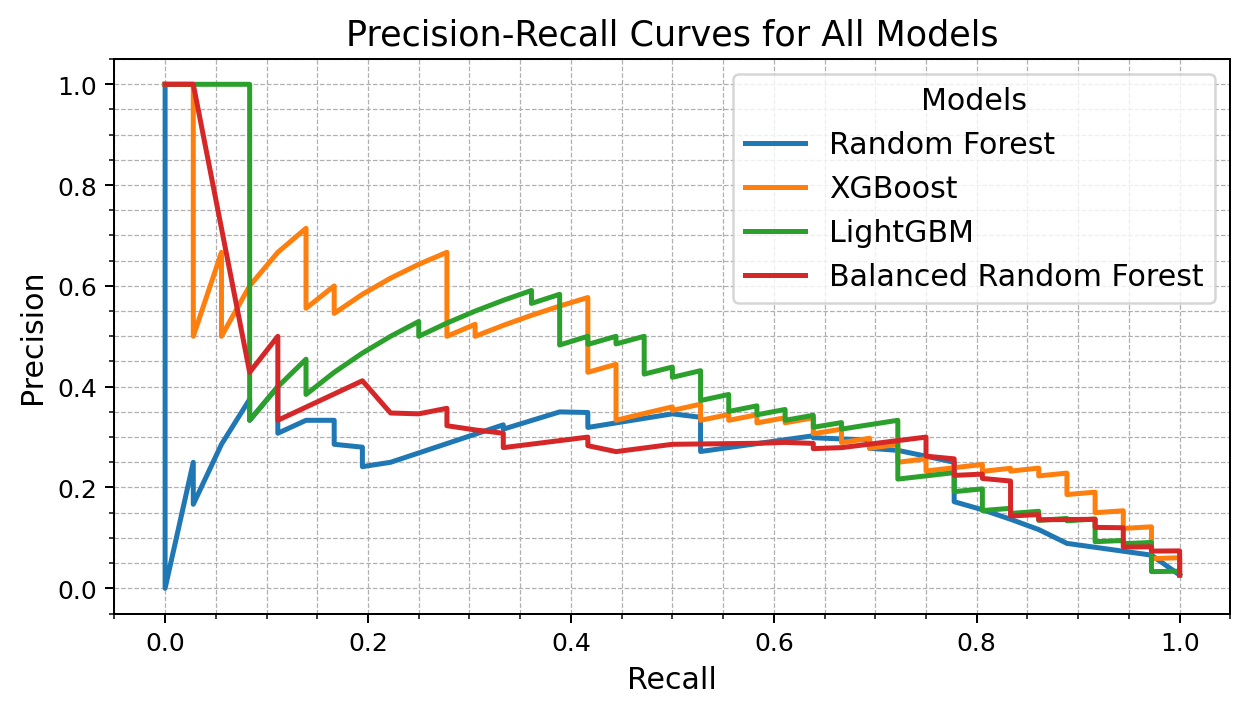

In [29]:
# List of models and their predicted values and probabilities
models = {
    "Random Forest": (y_pred_rf, y_prob_rf),
    "XGBoost": (y_pred_xgb, y_prob_xgb),
    "LightGBM": (y_pred_lgb, y_prob_lgb),
    "Balanced Random Forest": (y_pred_brf, y_prob_brf)
}

# Confusion Matrix Plots
# Single Figure for All Subplots
plt.figure(figsize=(15, 5), dpi=180)  # Set figure size and higher DPI once
for i, (model_name, (y_pred, _)) in enumerate(models.items(), 1):
    conf_matrix = confusion_matrix(Y_val, y_pred)
    plt.subplot(1, 4, i)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'],
                annot_kws={"size": 14})  # Adjust font size)
    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)
    plt.title(f"Confusion Matrix for {model_name}", fontsize=14)

plt.tight_layout()
plt.show()

# ROC Curve Plots
plt.figure(figsize=(8, 4), dpi=180) 
for model_name, (_, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(Y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})", linewidth=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curves for All Models", fontsize=14)
plt.legend(loc="lower right", fontsize=12, title="Models", title_fontsize=12)
plt.show()

# Precision-Recall Curve Plots
plt.figure(figsize=(8, 4), dpi=180) 
for model_name, (_, y_prob) in models.items():
    precision, recall, _ = precision_recall_curve(Y_val, y_prob)
    plt.plot(recall, precision, label=f"{model_name}", linewidth=2)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curves for All Models", fontsize=14)
plt.legend(loc="upper right", fontsize=12, title="Models", title_fontsize=12)
plt.show()

## 4. Model Selection

### 4.1 Hyperparameter Tuning for Selected Model
We have chosen the Balanced Random Forest model due to its high recall (86%), which aligns with our priority of identifying as many bankruptcies as possible in a highly imbalanced dataset. While its precision is low (14%), the model's ability to correctly classify 31 out of 36 bankruptcies outweighs the drawback of increased false positives. Next, we will optimize the model's performance through hyperparameter tuning, focusing on maximum tree depth (to control the complexity of the decision trees), sampling strategy (to balance the dataset more effectively), and the number of trees (to enhance model stability and accuracy).

In [30]:
# Hyperparameter values to test
max_depth_values = [10, 20, None]
sampling_strategies = ['auto', 0.5, 'all']
n_estimators_values = [100, 200, 300]

# To store results
results = []

# Loop through different configurations
for depth in max_depth_values:
    for strategy in sampling_strategies:
        for n_estimators in n_estimators_values:
            print(f"Testing max_depth={depth}, sampling_strategy={strategy}, n_estimators={n_estimators}")
            
            # Initialize Balanced Random Forest with specific hyperparameters
            brf_model = BalancedRandomForestClassifier(
                random_state=42, 
                max_depth=depth, 
                sampling_strategy=strategy,
                n_estimators=n_estimators,
                replacement=False,  # Current default, explicitly set to prevent warning
                bootstrap=True      # Current default, explicitly set to prevent warning
            )
            
            # Train the model
            brf_model.fit(X_train, Y_train)
            
            # Predict on the validation set
            y_pred_brf = brf_model.predict(X_val)
            y_prob_brf = brf_model.predict_proba(X_val)[:, 1]
            
            # Evaluate the model
            accuracy = accuracy_score(Y_val, y_pred_brf)
            roc_auc = roc_auc_score(Y_val, y_prob_brf)
            report = classification_report(Y_val, y_pred_brf, output_dict=True)
            recall = report['1']['recall']
            precision = report['1']['precision']
            f1 = report['1']['f1-score']
            
            # Store the results
            results.append({
                'max_depth': depth,
                'sampling_strategy': strategy,
                'n_estimators': n_estimators,
                'accuracy': accuracy,
                'roc_auc': roc_auc,
                'recall': recall,
                'precision': precision,
                'f1_score': f1
            })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
#results_df.to_csv("brf_hyperparameter_results.csv", index=False)
#print("Results saved to brf_hyperparameter_results.csv")


Testing max_depth=10, sampling_strategy=auto, n_estimators=100
Testing max_depth=10, sampling_strategy=auto, n_estimators=200
Testing max_depth=10, sampling_strategy=auto, n_estimators=300
Testing max_depth=10, sampling_strategy=0.5, n_estimators=100
Testing max_depth=10, sampling_strategy=0.5, n_estimators=200
Testing max_depth=10, sampling_strategy=0.5, n_estimators=300
Testing max_depth=10, sampling_strategy=all, n_estimators=100
Testing max_depth=10, sampling_strategy=all, n_estimators=200
Testing max_depth=10, sampling_strategy=all, n_estimators=300
Testing max_depth=20, sampling_strategy=auto, n_estimators=100
Testing max_depth=20, sampling_strategy=auto, n_estimators=200
Testing max_depth=20, sampling_strategy=auto, n_estimators=300
Testing max_depth=20, sampling_strategy=0.5, n_estimators=100
Testing max_depth=20, sampling_strategy=0.5, n_estimators=200
Testing max_depth=20, sampling_strategy=0.5, n_estimators=300
Testing max_depth=20, sampling_strategy=all, n_estimators=100
Te

### 4.2 Visualizing Parameter Results

In [31]:
# Display Top 10 Configurations by Recall
top_recall = results_df.sort_values(by='recall', ascending=False).head(10)
#top_roc_auc = results_df.sort_values(by='roc_auc', ascending=False).head(10)

# Format tables for better display
print("\nTop 10 Configurations by Recall")
display(top_recall.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_caption("Top 10 Configurations by Recall"))



Top 10 Configurations by Recall


,max_depth,sampling_strategy,n_estimators,accuracy,roc_auc,recall,precision,f1_score
24,nan,all,100,0.851906,0.944005,0.888889,0.139130,0.240602
6,10.000000,all,100,0.853372,0.944633,0.888889,0.140351,0.242424
15,20.000000,all,100,0.851906,0.944005,0.888889,0.139130,0.240602
0,10.000000,auto,100,0.849707,0.941506,0.861111,0.134199,0.232210
1,10.000000,auto,200,0.845308,0.942185,0.861111,0.130802,0.227106
25,nan,all,200,0.853372,0.940167,0.861111,0.137168,0.236641
20,nan,auto,300,0.851906,0.942991,0.861111,0.135965,0.234848
19,nan,auto,200,0.846041,0.942164,0.861111,0.131356,0.227941
18,nan,auto,100,0.851906,0.941380,0.861111,0.135965,0.234848
17,20.000000,all,300,0.850440,0.940366,0.861111,0.134783,0.233083


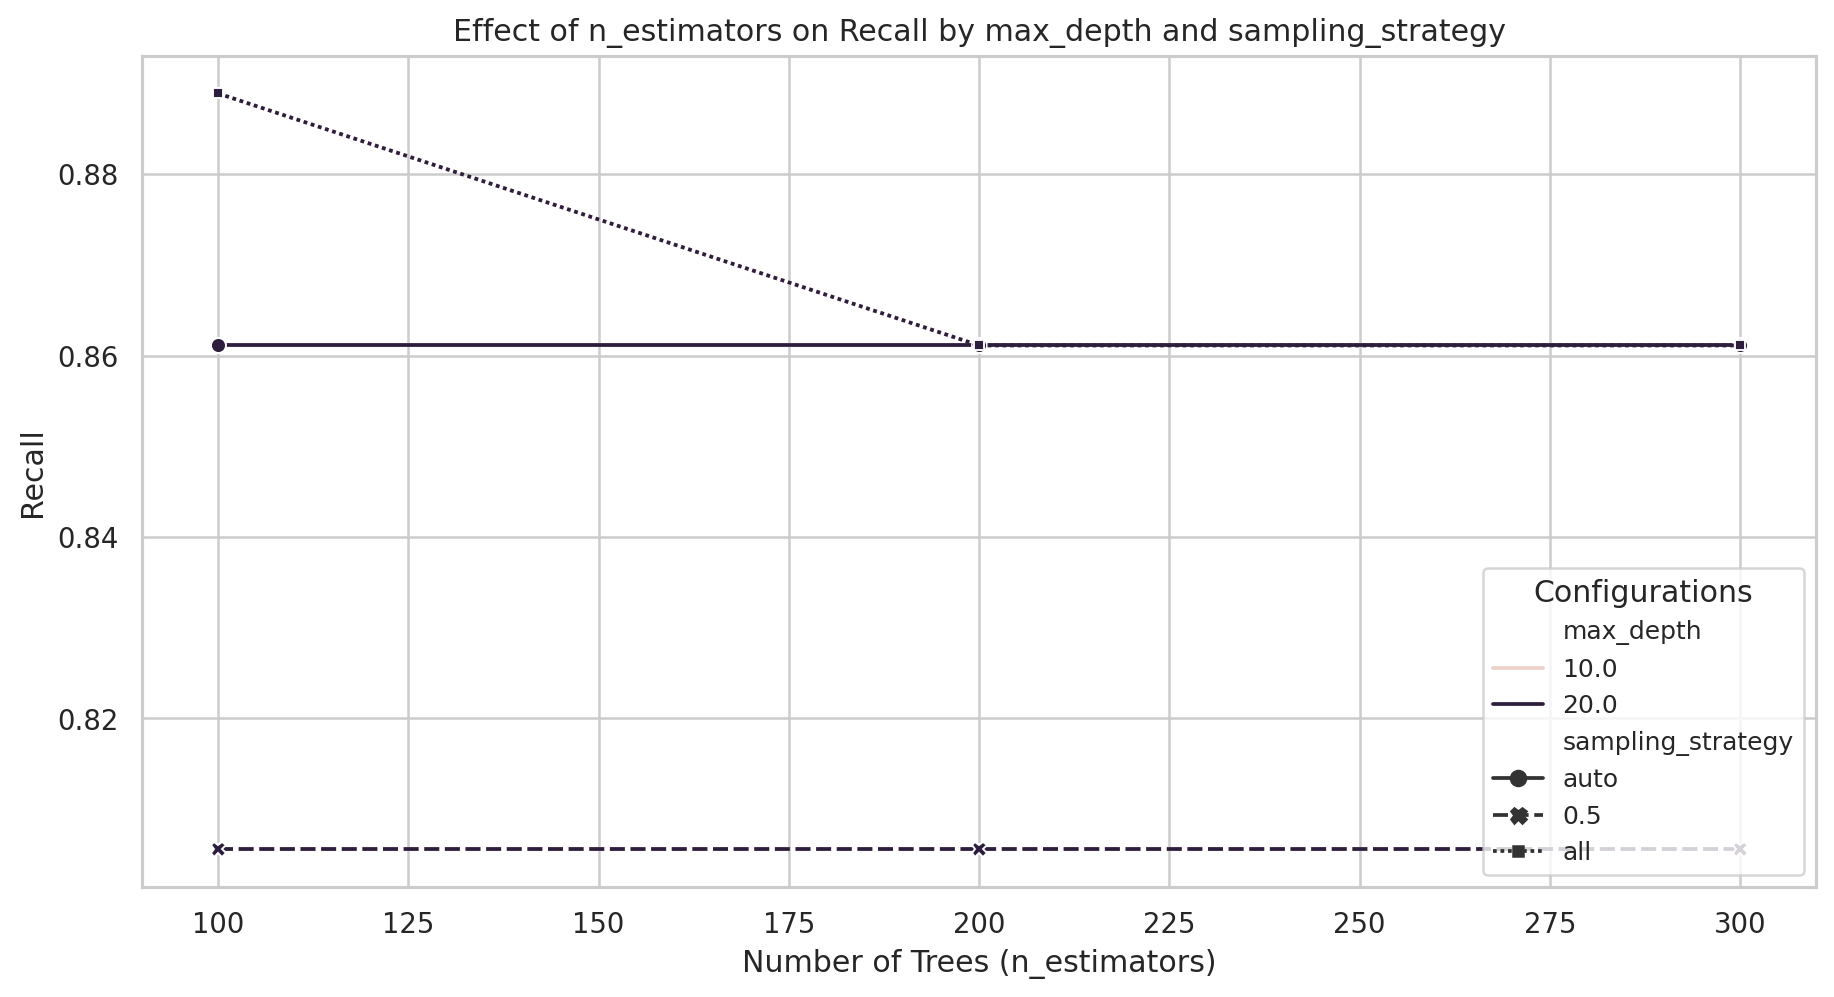

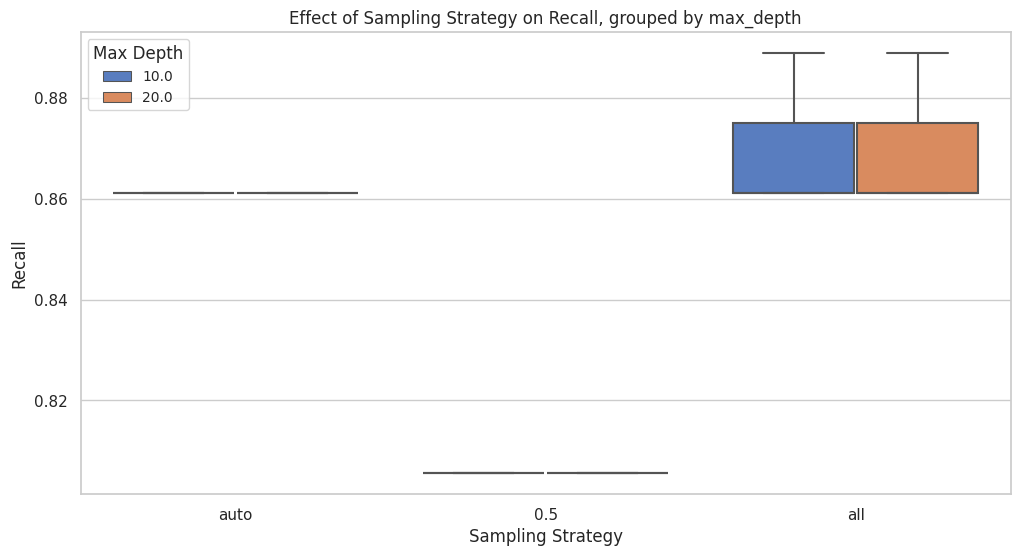

In [32]:
# Plot configurations
sns.set(style="whitegrid", palette="muted")

# Plot 1: Combined effects of max_depth, sampling_strategy, and n_estimators on Recall
plt.figure(figsize=(12, 6), dpi=180)
sns.lineplot(
    data=results_df,
    x='n_estimators',
    y='recall',
    hue='max_depth',
    style='sampling_strategy',
    markers=True
)
plt.title('Effect of n_estimators on Recall by max_depth and sampling_strategy')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Recall')
plt.legend(title="Configurations", loc="lower right", fontsize='small')
plt.show()

# Plot 4: Boxplots for Recall grouped by sampling_strategy
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='sampling_strategy', y='recall', hue='max_depth')
plt.title('Effect of Sampling Strategy on Recall, grouped by max_depth')
plt.xlabel('Sampling Strategy')
plt.ylabel('Recall')
plt.legend(title="Max Depth", fontsize='small')
plt.show()


### 4.3 Final Model Improvement
Based on the insights gained from the tables and plots, the final model should balance high recall (to minimize missed bankruptcies) with a reasonable precision (to reduce false positives). A good choice is a configuration with:

- max_depth=3: Deep enough to capture meaningful patterns without overfitting excessively.
- sampling_strategy=0.7: Balances the oversampling of the minority class while improving precision and recall.
- n_estimators=150: Provides sufficient stability and performance without significant diminishing returns.

The `sampling_strategy`=0.7 in BalancedRandomForestClassifier means that the minority class is oversampled (or the majority class is undersampled) so that its size becomes 70% of the majority class during training. Increasing the sampling ratio improves recall by including more minority-class samples but can cause precision to drop as the model may misclassify more majority-class samples as minority-class, leading to more false positives. This tradeoff between recall and precision reflects the balance introduced by adjusting the sampling strategy.

In [ ]:
# Final Model with Recommended Parameters
final_brf_model = BalancedRandomForestClassifier(
    random_state=42,
    max_depth=3,           
    sampling_strategy= 0.7,  #slightly higher than 0.5 to improve tradeoff between recall and precision
    n_estimators=150        #number of trees
)

# Train the model on the training data
final_brf_model.fit(X_train, Y_train)

# Predict on the validation set
y_pred_final = final_brf_model.predict(X_val)
y_prob_final = final_brf_model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("Final Balanced Random Forest Model Performance")
print("Classification Report:")
print(classification_report(Y_val, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(Y_val, y_pred_final))
print("ROC AUC Score:", roc_auc_score(Y_val, y_prob_final))
print("Accuracy:", accuracy_score(Y_val, y_pred_final))

Final Balanced Random Forest Model Performance
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1328
           1       0.19      0.86      0.31        36

    accuracy                           0.90      1364
   macro avg       0.59      0.88      0.63      1364
weighted avg       0.97      0.90      0.93      1364

Confusion Matrix:
 [[1196  132]
 [   5   31]]
ROC AUC Score: 0.9429384203480589
Accuracy: 0.8995601173020528


**Final Balanced Random Forest Model and Metrics**
- The final Balanced Random Forest model was optimized using max_depth=3 to control tree complexity and reduce overfitting, a sampling strategy of 0.7 to achieve a better balance between recall and precision, and 150 trees to ensure stability without excessive computation. These hyperparameters were selected after experimentation to enhance recall while maintaining reasonable precision and overall model performance.

**Final Balanced Random Forest Model Performance**
- Precision (Bankruptcy): 0.19 - Out of all predicted bankruptcies, 19% are correct, showing a slight improvement in precision.

- Recall (Bankruptcy): 0.86 - The model captures 86% of actual bankruptcies, maintaining strong performance in identifying the minority class.

- F1-Score (Bankruptcy): 0.31 - This score reflects a better balance between precision and recall compared to the previous version, though still driven by high recall.

- Accuracy: 0.90 - The model achieves 90% overall accuracy, a 5% increase from the non hyperparameterized balance random forest model. 

- ROC AUC: 0.94 - The model maintains strong overall discrimination between bankrupt and non-bankrupt classes.

- Confusion Matrix:

    - True Negatives: 1196 (correctly predicted non-bankruptcies)
    - False Positives: 132 (non-bankruptcies misclassified as bankruptcies)
    - False Negatives: 5 (bankruptcies misclassified as non-bankruptcies)
    - True Positives: 31 (correctly predicted bankruptcies)

## 5. Evaluating our final model on test data

### 5.1 Testing our Model's Generalization Ability

In [34]:
# Predict on the test set
y_pred_test = final_brf_model.predict(X_test)
y_prob_test = final_brf_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
print("Test Set Performance for Final Improved Balanced Random Forest Model:")
print("Classification Report:")
print(classification_report(Y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_test))
print("ROC AUC Score:", roc_auc_score(Y_test, y_prob_test))
print("Accuracy:", accuracy_score(Y_test, y_pred_test))


Test Set Performance for Final Improved Balanced Random Forest Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1307
           1       0.27      0.86      0.41        57

    accuracy                           0.90      1364
   macro avg       0.63      0.88      0.68      1364
weighted avg       0.96      0.90      0.92      1364

Confusion Matrix:
 [[1174  133]
 [   8   49]]
ROC AUC Score: 0.9407777285601149
Accuracy: 0.8966275659824047


### 5.2 Plotting Final Improved Model metrics

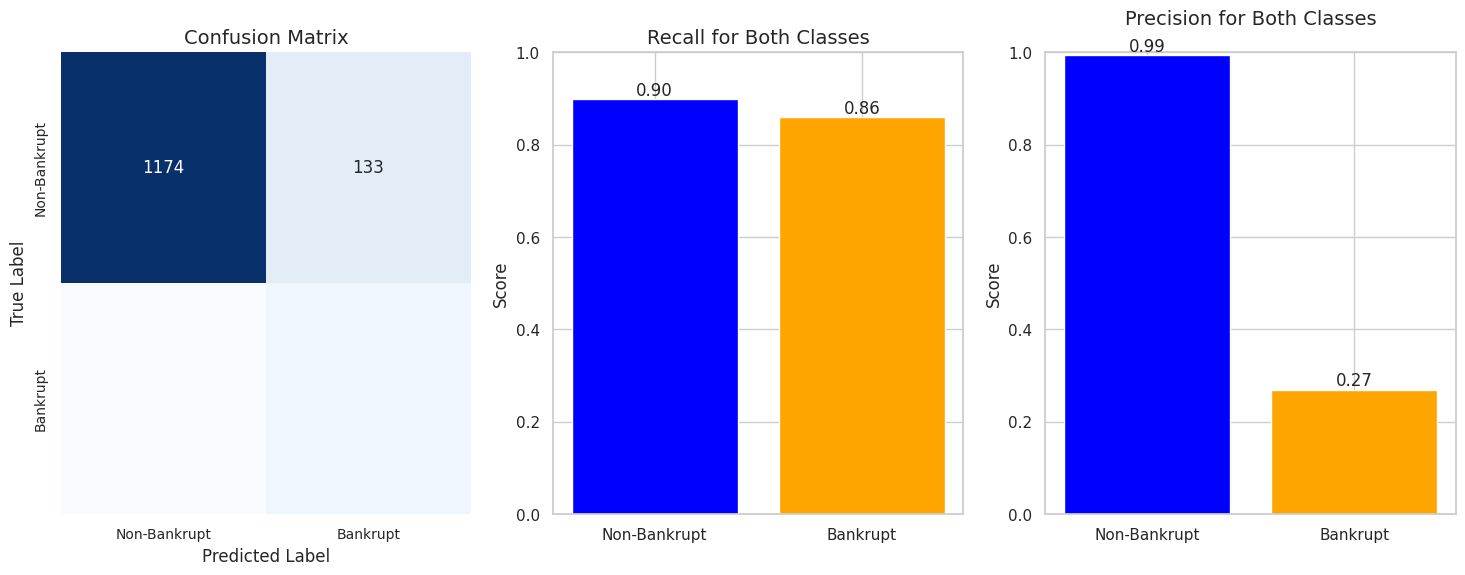

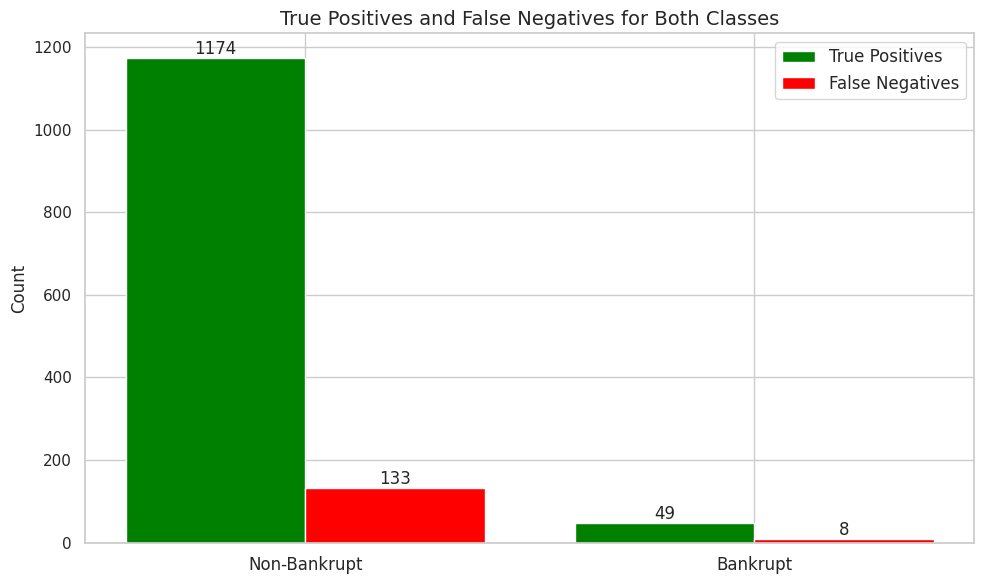

In [35]:
# Get the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_test)
tn, fp, fn, tp = conf_matrix.ravel()

# Compute classification metrics
report = classification_report(Y_test, y_pred_test, output_dict=True)
recall_non_bankrupt = report['0']['recall']  # Recall for the non-bankruptcy class
recall_bankrupt = report['1']['recall']     # Recall for the bankruptcy class
precision_non_bankrupt = report['0']['precision']  # Precision for the non-bankruptcy class
precision_bankrupt = report['1']['precision']      # Precision for the bankruptcy class

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0], annot_kws={"size": 12})
axes[0].set_title("Confusion Matrix", fontsize=14)
axes[0].set_xlabel("Predicted Label", fontsize=12)
axes[0].set_ylabel("True Label", fontsize=12)
axes[0].set_xticklabels(["Non-Bankrupt", "Bankrupt"], fontsize=10)
axes[0].set_yticklabels(["Non-Bankrupt", "Bankrupt"], fontsize=10)

# Plot recall for both classes
bars_recall = axes[1].bar(["Non-Bankrupt", "Bankrupt"], [recall_non_bankrupt, recall_bankrupt], color=["blue", "orange"])
axes[1].set_ylim(0, 1)
axes[1].set_title("Recall for Both Classes", fontsize=14)
axes[1].set_ylabel("Score", fontsize=12)
for bar in bars_recall:
    axes[1].annotate(f"{bar.get_height():.2f}", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha="center", va="bottom", fontsize=12)

# Plot precision for both classes
bars_precision = axes[2].bar(
    ["Non-Bankrupt", "Bankrupt"], 
    [precision_non_bankrupt, precision_bankrupt], 
    color=["blue", "orange"]
)
axes[2].set_ylim(0, 1)
axes[2].set_title("Precision for Both Classes", fontsize=14, pad=20)  # Increase padding to prevent overlap
axes[2].set_ylabel("Score", fontsize=12)

# Annotate bars with values
for bar in bars_precision:
    axes[2].annotate(
        f"{bar.get_height():.2f}",
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=12
    )

# Plot True Positives and False Negatives for both classes
fig, ax = plt.subplots(figsize=(10, 6))
labels = ["Non-Bankrupt", "Bankrupt"]
tp_counts = [tn, tp]  # True Negatives for Non-Bankrupt, True Positives for Bankrupt
fn_counts = [fp, fn]  # False Positives for Non-Bankrupt, False Negatives for Bankrupt

x = range(len(labels))
width = 0.4

# True Positives/Negatives Bars
tp_bars = ax.bar([p - width / 2 for p in x], tp_counts, width=width, label="True Positives", color="green")
# False Positives/Negatives Bars
fn_bars = ax.bar([p + width / 2 for p in x], fn_counts, width=width, label="False Negatives", color="red")

# Add labels
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_title("True Positives and False Negatives for Both Classes", fontsize=14)
ax.set_ylabel("Count", fontsize=12)
ax.legend(fontsize=12)

# Annotate numbers
for bar in tp_bars:
    ax.annotate(f"{bar.get_height()}", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha="center", va="bottom", fontsize=12)
for bar in fn_bars:
    ax.annotate(f"{bar.get_height()}", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha="center", va="bottom", fontsize=12)

plt.tight_layout()
plt.show()


#### **Test Set Performance for Final Improved Balanced Random Forest Model**
- Precision (Bankruptcy): 0.27 - On the test set, 27% of predicted bankruptcies are correct, showing an almost 14% improvement over validation precision and demonstrating reasonable generalization.

- Recall (Bankruptcy): 0.86 - The model captures 86% of actual bankruptcies, maintaining the strong recall observed during validation, confirming its robustness in detecting the minority class.

- F1-Score (Bankruptcy): 0.41 - The F1-score improves on the test set compared to validation, reflecting a better balance between precision and recall for the bankruptcy class.

- ROC AUC: 0.94 - The model maintains excellent overall discrimination between bankrupt and non-bankrupt cases on the test set.

- Accuracy: 0.90 - The model achieves 90% overall accuracy, consistent with its validation performance, showcasing good generalization to unseen data.

- Confusion Matrix:
    - True Negatives: 1174 (correctly predicted non-bankruptcies)
    - False Positives: 133 (non-bankruptcies misclassified as bankruptcies)
    - False Negatives: 8 (bankruptcies misclassified as non-bankruptcies)
    - True Positives: 49 (correctly predicted bankruptcies)

The final Balanced Random Forest model demonstrates strong generalization performance on the test set, achieving a high recall of 86%, ensuring that the majority of bankruptcies are correctly identified. The precision improved significantly from 14% to 27%, indicating better accuracy in predicting bankruptcies while maintaining a balance with recall. Additionally, the model achieved a ROC AUC score of 0.94, reflecting excellent discrimination between bankrupt and non-bankrupt cases. Compared to the model before hyperparameter tuning, the final version shows a ~5% improvement in accuracy (90% vs. 85%), showcasing enhanced overall performance. With only 8 missed bankruptcies out of 57, this optimized model effectively addresses the task's priorities, making it highly reliable for bankruptcy prediction. The improved metrics also demonstrates our model's ability to generalize well to unseen data.

## 6. Implementation and Avenues for Future Work

Top 10 Important Features:
                                     Feature  Importance
25                Total debt/Total net worth    0.093180
10   Persistent EPS in the Last Four Seasons    0.090516
28                      Borrowing dependency    0.077571
26                              Debt ratio %    0.069272
73                       Equity to Liability    0.061706
54                Total income/Total expense    0.049165
69        Net Income to Stockholder's Equity    0.044489
24                    Interest Expense Ratio    0.038205
70        Degree of Financial Leverage (DFL)    0.037938
53         Retained Earnings to Total Assets    0.035987


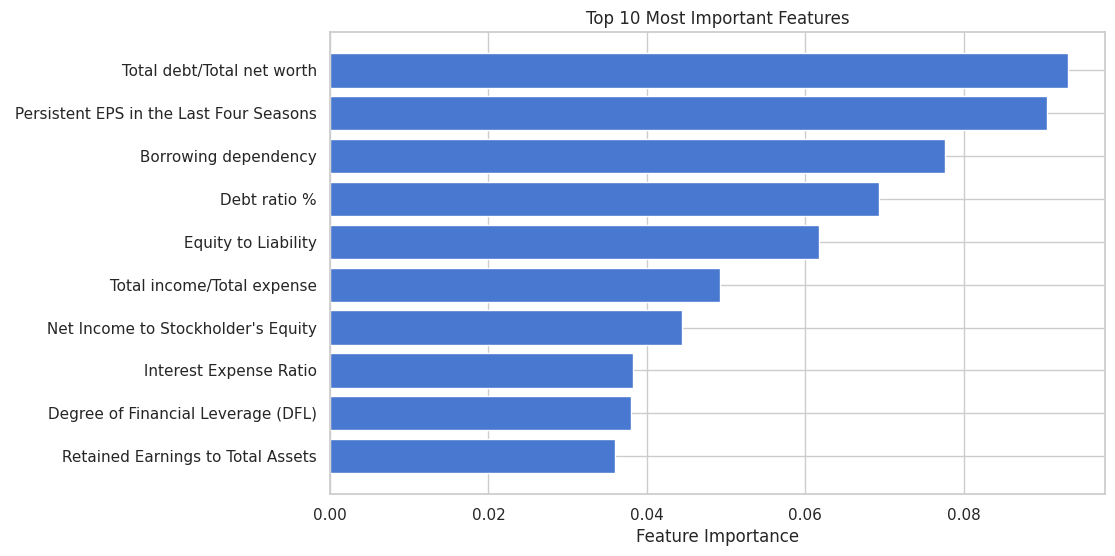

In [36]:
# Extract feature names from the original DataFrame
feature_names = df_reduced.columns

# Map feature importances to feature names
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': final_brf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Important Features:")
print(feature_importances.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'].head(10), feature_importances['Importance'].head(10)) #color='blue'
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.show()
